<a href="https://colab.research.google.com/github/AldoF95/diplomski_rad_masters_thesis/blob/main/intent_recognition_phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow_text

In [ ]:
!pip install --upgrade matplotlib

# Data loading

In [ ]:
import tensorflow as tf
#import tensorflow_text as tft
import tensorflow_hub as tfh
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/chatbot-data.xlsx')

In [ ]:
#text preprocessor for bert based models
preprocessor = tfh.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-preprocess/2')
#Language Agnostic BERT sentence encoder
model = tfh.KerasLayer('https://tfhub.dev/google/LaBSE/2')

In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tekst_pitanja          208 non-null    object
 1   vrsta_akcije           208 non-null    object
 2   namjera                208 non-null    object
 3   namjera_02             208 non-null    object
 4   eng_google_translator  208 non-null    object
 5   eng_human_translation  208 non-null    object
dtypes: object(6)
memory usage: 9.9+ KB


In [ ]:
#text -> hrvatski text
#action -> vrsta akcije (ne koristim ovdje)
#intent -> 3 classes of intents
#intetn -> 5 classes of intents
#g_translation -> translation hr->eng using google translator
#h_translation -> translation hr->eng manualy   
columns = ['text', 'action', 'intent', 'intent02', 'g_translation', 'h_translation']
data.columns = columns

In [ ]:
#creating out of domain category
data['intent02'][data['intent02']=='studomat_problemi'] = 'OOD'
data['intent02'][data['intent02']=='status_studenta'] = 'OOD'

In [ ]:
data['intent02'] = data['intent02'].astype('category')
data['intent_codes'] = data['intent02'].cat.codes

<StemContainer object of 3 artists>

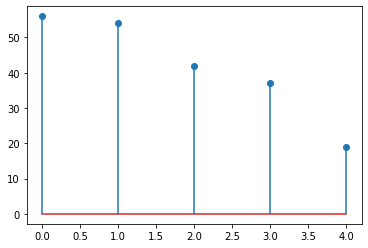

In [ ]:
values = data['intent02'].value_counts()
plt.stem(values)

In [ ]:
upis_data = data[data['intent02']=='upis_na_sveuciliste']
upis_data = upis_data.sample(frac=1, random_state=1234)
upis_data = upis_data.sample(40)
upis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 21 to 1
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   text           40 non-null     object  
 1   action         40 non-null     object  
 2   intent         40 non-null     object  
 3   intent02       40 non-null     category
 4   g_translation  40 non-null     object  
 5   h_translation  40 non-null     object  
 6   intent_codes   40 non-null     int8    
dtypes: category(1), int8(1), object(5)
memory usage: 2.1+ KB


In [ ]:
ood_data = data[data['intent02']=='OOD']
ood_data = ood_data.sample(frac=1, random_state=1234)
ood_data = ood_data.sample(40)
ood_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 28 to 41
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   text           40 non-null     object  
 1   action         40 non-null     object  
 2   intent         40 non-null     object  
 3   intent02       40 non-null     category
 4   g_translation  40 non-null     object  
 5   h_translation  40 non-null     object  
 6   intent_codes   40 non-null     int8    
dtypes: category(1), int8(1), object(5)
memory usage: 2.1+ KB


In [ ]:
data2 = data[(data['intent02'] != 'OOD') & (data['intent02'] != 'upis_na_sveuciliste')]
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 54 to 207
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   text           98 non-null     object  
 1   action         98 non-null     object  
 2   intent         98 non-null     object  
 3   intent02       98 non-null     category
 4   g_translation  98 non-null     object  
 5   h_translation  98 non-null     object  
 6   intent_codes   98 non-null     int8    
dtypes: category(1), int8(1), object(5)
memory usage: 5.0+ KB


In [ ]:
data2 = data2.append(upis_data, ignore_index=True)
data2 = data2.append(ood_data, ignore_index=True)

<StemContainer object of 3 artists>

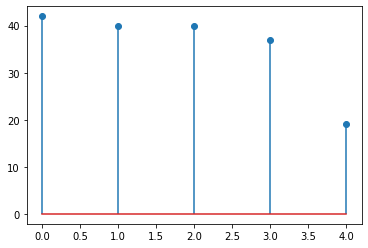

In [ ]:
values = data2['intent02'].value_counts()
plt.stem(values)

In [ ]:
data = data2

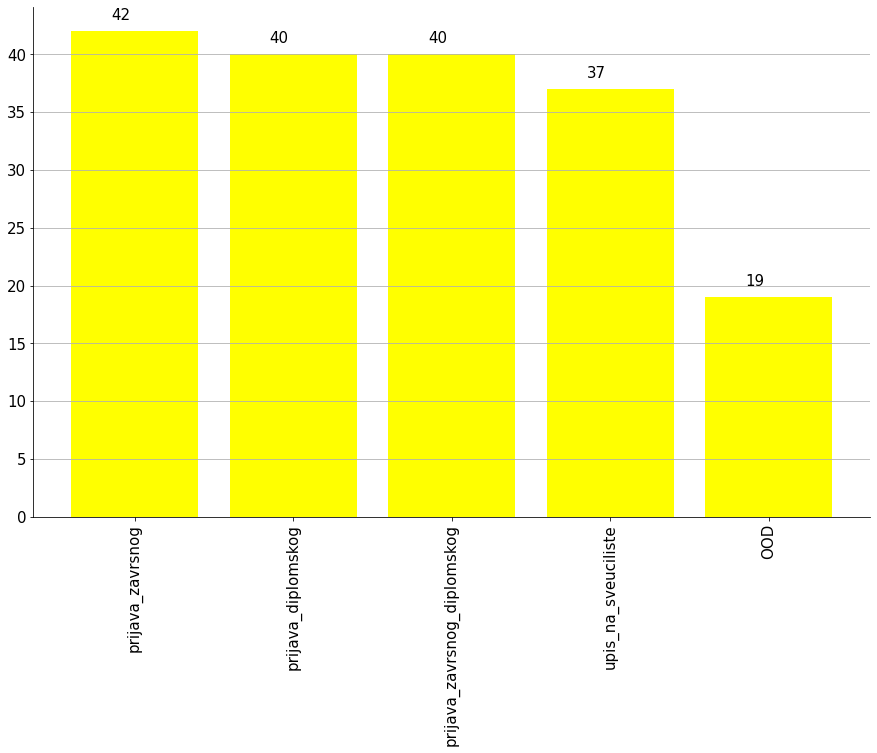

In [ ]:
bars = data2['intent02'].unique()
height = data2['intent02'].value_counts()

plt.figure(figsize=(15, 12))
#plt.subplots_adjust(top=10)
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')


plt.bar(data2['intent02'].unique(), data2['intent02'].value_counts(), color='yellow')
plt.grid(True, axis='y')
# Rotation of the bar names
plt.xticks(bars, rotation=90, fontsize=15)
plt.yticks(fontsize=15)
 
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)

for index,data in enumerate(height):
    plt.text(x=index-0.15 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))


# Show graphic
plt.show()

In [ ]:
import seaborn as sns

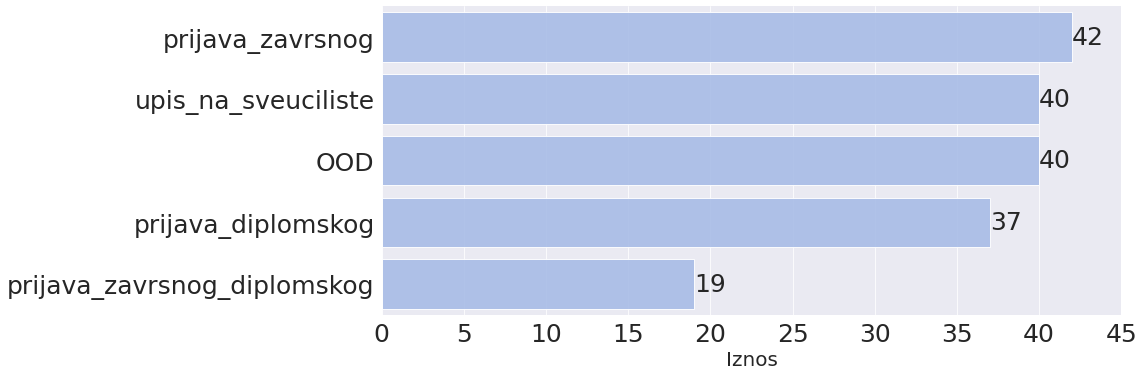

In [ ]:
font_s = 25
sns.set_style("darkgrid")
hist = sns.catplot(y="intent02", 
                   kind="count", 
                   color="#9DB9F1",
                   alpha=0.9,
                   data=data2,
                   order=data2['intent02'].value_counts().index)
hist.fig.set_size_inches(20, 4.8)
hist.set_xticklabels(fontsize=font_s)
hist.set_yticklabels(fontsize=font_s)
hist.set(xlabel='Iznos', ylabel=None)
hist.set_xlabels(label='Iznos', fontsize=font_s-5)

ax = hist.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_width())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', fontsize=font_s)


In [ ]:
data2['intent02'].value_counts()

prijava_zavrsnog               42
upis_na_sveuciliste            40
OOD                            40
prijava_diplomskog             37
prijava_zavrsnog_diplomskog    19
Name: intent02, dtype: int64

# Train - Validation split

In [ ]:
codes = data['intent_codes'].unique()

In [ ]:
#train - validation split
#TODO fixed validation split
validation_data = pd.DataFrame(columns=data.columns)
train_data = pd.DataFrame(columns=data.columns)
for c in codes:
  sample = data[data['intent_codes']==c]
  sample = sample.sample(frac=1)
  val = sample.sample(frac=0.2)
  train = pd.concat([sample, val]).drop_duplicates(keep=False)
  validation_data = validation_data.append(val, ignore_index=True)
  train_data = train_data.append(train, ignore_index=True)

In [ ]:
validation_data['intent02'].value_counts()

upis_na_sveuciliste            8
prijava_zavrsnog               8
OOD                            8
prijava_diplomskog             7
prijava_zavrsnog_diplomskog    4
Name: intent02, dtype: int64

In [ ]:
train_data['intent02'].value_counts()

prijava_zavrsnog               34
upis_na_sveuciliste            32
OOD                            32
prijava_diplomskog             30
prijava_zavrsnog_diplomskog    15
Name: intent02, dtype: int64

# Split by language and dataframe to dataset transformation

In [ ]:
train_data.head()

In [ ]:
#google translation data
train_data_eng = train_data[['g_translation', 'intent_codes']]
validation_data_eng = validation_data[['g_translation', 'intent_codes']]
train_data_eng.columns = ['text', 'intent_codes']
validation_data_eng.columns = ['text', 'intent_codes']
#croatian data
train_data_hr = train_data[['text', 'intent_codes']]
validation_data_hr = validation_data[['text', 'intent_codes']]
train_data_hr.columns = ['text', 'intent_codes']
validation_data_hr.columns = ['text', 'intent_codes']
#human translation data
train_data_human = train_data[['h_translation', 'intent_codes']]
validation_data_human = validation_data[['h_translation', 'intent_codes']]
train_data_human.columns = ['text', 'intent_codes']
validation_data_human.columns = ['text', 'intent_codes']
#google translation + croatian data
train_data_eng_hr = train_data_eng.append(train_data_hr, ignore_index = True)
validation_data_eng_hr = validation_data_eng.append(validation_data_hr, ignore_index = True)

#human translation + croatian data
train_data_human_hr = train_data_human.append(train_data_hr, ignore_index = True)
validation_data_human_hr = validation_data_human.append(validation_data_hr, ignore_index = True)


In [ ]:
def df_to_dataset(df, shuffle=True, batch_size=16):
  df = df.copy()
  labels = df.pop('intent_codes')
  lables_cat = tf.keras.utils.to_categorical(labels, 5)
  dataset = tf.data.Dataset.from_tensor_slices((dict(df), lables_cat))
  if shuffle:
    dataset = dataset.shuffle(buffer_size=len(df))
  dataset = dataset.batch(batch_size).prefetch(batch_size)
  return dataset

In [ ]:
train_data_eng = df_to_dataset(train_data_eng)
validation_data_eng = df_to_dataset(validation_data_eng)

train_data_hr = df_to_dataset(train_data_hr)
validation_data_hr = df_to_dataset(validation_data_hr)

train_data_human = df_to_dataset(train_data_human)
validation_data_human = df_to_dataset(validation_data_human)

train_data_eng_hr = df_to_dataset(train_data_eng_hr)
validation_data_eng_hr = df_to_dataset(validation_data_eng_hr)

train_data_human_hr = df_to_dataset(train_data_human_hr)
validation_data_human_hr = df_to_dataset(validation_data_human_hr)

# Model

In [ ]:
def model_build():
  inputs = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  encoded_input = preprocessor(inputs)
  encoder_outputs = model(encoded_input)
  x = encoder_outputs['pooled_output']
  x = tf.keras.layers.Dropout(0.1)(x)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.7)(x)
  outputs = tf.keras.layers.Dense(5, activation='softmax', name='classifier')(x)
  return tf.keras.Model(inputs, outputs)

In [ ]:
model_test = model_build()
model_test.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        {'input_type_ids': ( 0           text[0][0]                       
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      {'pooled_output': (N 470926849   keras_layer[0][0]                
                                                                 keras_layer[0][1]                
                                                                 keras_layer[0][2]                
______________________________________________________________________________________________

In [ ]:
#MODEL ENG
model_eng = model_build()
model_eng.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

eng_history = model_eng.fit(
    train_data_eng,
    epochs = 10,
    batch_size = 16,
    validation_data = validation_data_eng
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


9/9 [==============================] - 57s 6s/step - loss: 1.7941 - categorical_accuracy: 0.2937 - val_loss: 1.1410 - val_categorical_accuracy: 0.6571
Epoch 2/10
9/9 [==============================] - 53s 6s/step - loss: 1.1218 - categorical_accuracy: 0.5245 - val_loss: 0.7839 - val_categorical_accuracy: 0.9143
Epoch 3/10
9/9 [==============================] - 53s 6s/step - loss: 0.7997 - categorical_accuracy: 0.7273 - val_loss: 0.5646 - val_categorical_accuracy: 0.9429
Epoch 4/10
9/9 [==============================] - 53s 6s/step - loss: 0.6050 - categorical_accuracy: 0.8042 - val_loss: 0.4507 - val_categorical_accuracy: 0.9429
Epoch 5/10
9/9 [==============================] - 53s 6s/step - loss: 0.4349 - categorical_accuracy: 0.8741 - val_loss: 0.3949 - val_categorical_accuracy: 0.9143
Epoch 6/10
9/9 [==============================] - 53s 6s/step - loss: 0.3940 - categorical_accuracy: 0.8951 - val_loss: 0.3305 - val_categorical_accuracy: 0.9429
Epoch 7/10
9/9 [=======================

In [ ]:
#MODEL HR
model_hr = model_build()
model_hr.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

hr_history = model_hr.fit(
    train_data_hr,
    epochs = 8,
    batch_size = 16,
    validation_data = validation_data_hr
)

Epoch 1/8


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


9/9 [==============================] - 56s 6s/step - loss: 1.8094 - categorical_accuracy: 0.3077 - val_loss: 1.1130 - val_categorical_accuracy: 0.6571
Epoch 2/8
9/9 [==============================] - 53s 6s/step - loss: 1.2131 - categorical_accuracy: 0.4895 - val_loss: 0.8263 - val_categorical_accuracy: 0.8000
Epoch 3/8
9/9 [==============================] - 53s 6s/step - loss: 0.8244 - categorical_accuracy: 0.6993 - val_loss: 0.6219 - val_categorical_accuracy: 0.9143
Epoch 4/8
9/9 [==============================] - 52s 6s/step - loss: 0.7495 - categorical_accuracy: 0.7552 - val_loss: 0.4866 - val_categorical_accuracy: 0.9429
Epoch 5/8
9/9 [==============================] - 52s 6s/step - loss: 0.5818 - categorical_accuracy: 0.8182 - val_loss: 0.4022 - val_categorical_accuracy: 0.9143
Epoch 6/8
9/9 [==============================] - 53s 6s/step - loss: 0.4415 - categorical_accuracy: 0.8531 - val_loss: 0.3474 - val_categorical_accuracy: 0.9429
Epoch 7/8
9/9 [=============================

In [ ]:
#MODEL HUMAN
model_human = model_build()
model_human.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

human_history = model_human.fit(
    train_data_human,
    epochs = 8,
    batch_size = 16,
    validation_data = validation_data_human
)

Epoch 1/8


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


9/9 [==============================] - 55s 6s/step - loss: 1.6177 - categorical_accuracy: 0.3077 - val_loss: 0.8812 - val_categorical_accuracy: 0.8286
Epoch 2/8
9/9 [==============================] - 52s 6s/step - loss: 0.9931 - categorical_accuracy: 0.6294 - val_loss: 0.5706 - val_categorical_accuracy: 0.8571
Epoch 3/8
9/9 [==============================] - 52s 6s/step - loss: 0.7052 - categorical_accuracy: 0.7762 - val_loss: 0.4209 - val_categorical_accuracy: 0.8571
Epoch 4/8
9/9 [==============================] - 52s 6s/step - loss: 0.4930 - categorical_accuracy: 0.8462 - val_loss: 0.3203 - val_categorical_accuracy: 0.9143
Epoch 5/8
9/9 [==============================] - 52s 6s/step - loss: 0.3935 - categorical_accuracy: 0.8881 - val_loss: 0.2709 - val_categorical_accuracy: 0.9143
Epoch 6/8
9/9 [==============================] - 52s 6s/step - loss: 0.2536 - categorical_accuracy: 0.9371 - val_loss: 0.2439 - val_categorical_accuracy: 0.9143
Epoch 7/8
9/9 [=============================

In [ ]:
#MODEL ENG+HR
model_eng_hr = model_build()
model_eng_hr.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

eng_hr_history = model_eng_hr.fit(
    train_data_eng_hr,
    epochs = 10,
    batch_size = 16,
    validation_data = validation_data_eng_hr
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


18/18 [==============================] - 108s 6s/step - loss: 1.5901 - categorical_accuracy: 0.3706 - val_loss: 0.8617 - val_categorical_accuracy: 0.7429
Epoch 2/10
18/18 [==============================] - 104s 6s/step - loss: 0.7684 - categorical_accuracy: 0.7413 - val_loss: 0.4815 - val_categorical_accuracy: 0.9143
Epoch 3/10
18/18 [==============================] - 104s 6s/step - loss: 0.5412 - categorical_accuracy: 0.8462 - val_loss: 0.3616 - val_categorical_accuracy: 0.8857
Epoch 4/10
18/18 [==============================] - 105s 6s/step - loss: 0.3682 - categorical_accuracy: 0.8916 - val_loss: 0.2899 - val_categorical_accuracy: 0.9000
Epoch 5/10
18/18 [==============================] - 104s 6s/step - loss: 0.3026 - categorical_accuracy: 0.9056 - val_loss: 0.2550 - val_categorical_accuracy: 0.9000
Epoch 6/10
18/18 [==============================] - 103s 6s/step - loss: 0.2398 - categorical_accuracy: 0.9266 - val_loss: 0.2452 - val_categorical_accuracy: 0.9000
Epoch 7/10
18/18 [===

In [ ]:
#MODEL HUMAN+HR
model_human_hr = model_build()
model_human_hr.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

human_hr_history = model_human_hr.fit(
    train_data_human_hr,
    epochs = 10,
    batch_size = 16,
    validation_data = validation_data_human_hr
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


18/18 [==============================] - 107s 6s/step - loss: 1.5847 - categorical_accuracy: 0.3846 - val_loss: 0.8184 - val_categorical_accuracy: 0.8286
Epoch 2/10
18/18 [==============================] - 105s 6s/step - loss: 0.8407 - categorical_accuracy: 0.6853 - val_loss: 0.4954 - val_categorical_accuracy: 0.9143
Epoch 3/10
18/18 [==============================] - 104s 6s/step - loss: 0.5390 - categorical_accuracy: 0.8182 - val_loss: 0.3283 - val_categorical_accuracy: 0.9143
Epoch 4/10
18/18 [==============================] - 104s 6s/step - loss: 0.3345 - categorical_accuracy: 0.9091 - val_loss: 0.2580 - val_categorical_accuracy: 0.9000
Epoch 5/10
18/18 [==============================] - 104s 6s/step - loss: 0.3393 - categorical_accuracy: 0.8776 - val_loss: 0.2167 - val_categorical_accuracy: 0.9429
Epoch 6/10
18/18 [==============================] - 104s 6s/step - loss: 0.2907 - categorical_accuracy: 0.9196 - val_loss: 0.1944 - val_categorical_accuracy: 0.9429
Epoch 7/10
18/18 [===

# Text preprocessing

In [ ]:
import string
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def tokenization(text):
    tokens = re.split(r"\s+",text)
    return tokens

stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

porter_stemmer = PorterStemmer()
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [ ]:
#remove punctuations
data['h_translation']= data['h_translation'].apply(lambda x:remove_punctuation(x))
data['text'] = data['text'].apply(lambda x:remove_punctuation(x))
data.head()

,text,action,intent,intent02,g_translation,h_translation,intent_codes
0,kako prijaviti zavrsni,static_faq,prijava_zavrsnog_diplomskog,prijava_zavrsnog,How to Report Final,how to register my final paper,2
1,kako prijaviti diplomski,static_faq,prijava_zavrsnog_diplomskog,prijava_diplomskog,How to report graduate,how to register my masters thesis,1
2,mogu pokrenuti postupak prijave zavrsnog,pokreni_proces,prijava_zavrsnog_diplomskog,prijava_zavrsnog,can initiate a completion process of final,can i start the process for the final paper re...,2
3,mogu pokrenuti postupak prijave diplomskog,pokreni_proces,prijava_zavrsnog_diplomskog,prijava_diplomskog,can initiate a graduate procedure,can i start the process for the masters thesis...,1
4,koje su teme za zavrsni,dynamic_faq,prijava_zavrsnog_diplomskog,prijava_zavrsnog,What are the topics for the final,what are the topics for the final paper,2


In [ ]:
#lowercase
data['h_translation']= data['h_translation'].apply(lambda x: x.lower())
data['text']= data['text'].apply(lambda x: x.lower())
data.head()

,text,action,intent,intent02,g_translation,h_translation,intent_codes
0,kako prijaviti zavrsni,static_faq,prijava_zavrsnog_diplomskog,prijava_zavrsnog,How to Report Final,how to register my final paper,2
1,kako prijaviti diplomski,static_faq,prijava_zavrsnog_diplomskog,prijava_diplomskog,How to report graduate,how to register my masters thesis,1
2,mogu pokrenuti postupak prijave zavrsnog,pokreni_proces,prijava_zavrsnog_diplomskog,prijava_zavrsnog,can initiate a completion process of final,can i start the process for the final paper re...,2
3,mogu pokrenuti postupak prijave diplomskog,pokreni_proces,prijava_zavrsnog_diplomskog,prijava_diplomskog,can initiate a graduate procedure,can i start the process for the masters thesis...,1
4,koje su teme za zavrsni,dynamic_faq,prijava_zavrsnog_diplomskog,prijava_zavrsnog,What are the topics for the final,what are the topics for the final paper,2


In [ ]:
#tokenize split
data['h_translation']= data['h_translation'].apply(lambda x: tokenization(x))
data['text']= data['text'].apply(lambda x: tokenization(x))
data.head()

,text,action,intent,intent02,g_translation,h_translation,intent_codes
0,"[kako, prijaviti, zavrsni]",static_faq,prijava_zavrsnog_diplomskog,prijava_zavrsnog,How to Report Final,"[how, to, register, my, final, paper]",2
1,"[kako, prijaviti, diplomski]",static_faq,prijava_zavrsnog_diplomskog,prijava_diplomskog,How to report graduate,"[how, to, register, my, masters, thesis]",1
2,"[mogu, pokrenuti, postupak, prijave, zavrsnog]",pokreni_proces,prijava_zavrsnog_diplomskog,prijava_zavrsnog,can initiate a completion process of final,"[can, i, start, the, process, for, the, final,...",2
3,"[mogu, pokrenuti, postupak, prijave, diplomskog]",pokreni_proces,prijava_zavrsnog_diplomskog,prijava_diplomskog,can initiate a graduate procedure,"[can, i, start, the, process, for, the, master...",1
4,"[koje, su, teme, za, zavrsni]",dynamic_faq,prijava_zavrsnog_diplomskog,prijava_zavrsnog,What are the topics for the final,"[what, are, the, topics, for, the, final, paper]",2


In [ ]:
#stopwords remove (eng)
data['h_translation']= data['h_translation'].apply(lambda x:remove_stopwords(x))
data['h_translation'].head()

0                           [register, final, paper]
1                        [register, masters, thesis]
2       [start, process, final, paper, registration]
3    [start, process, masters, thesis, registration]
4                             [topics, final, paper]
Name: h_translation, dtype: object

In [ ]:
#stemming (eng)
#data['h_translation']=data['h_translation'].apply(lambda x: stemming(x))
#data['h_translation'].head()

0                      [regist, final, paper]
1                     [regist, master, thesi]
2     [start, process, final, paper, registr]
3    [start, process, master, thesi, registr]
4                       [topic, final, paper]
Name: h_translation, dtype: object

In [ ]:
#lemmatization (eng)
data['h_translation']=data['h_translation'].apply(lambda x:lemmatizer(x))
data['h_translation'].head()

0                          [register, final, paper]
1                        [register, master, thesis]
2      [start, process, final, paper, registration]
3    [start, process, master, thesis, registration]
4                             [topic, final, paper]
Name: h_translation, dtype: object

In [ ]:
data['g_translation']= data['g_translation'].apply(lambda x:remove_punctuation(x))
data['g_translation']= data['g_translation'].apply(lambda x: x.lower())
data['g_translation']= data['g_translation'].apply(lambda x: tokenization(x))
data['g_translation']= data['g_translation'].apply(lambda x:remove_stopwords(x))
data['g_translation']=data['g_translation'].apply(lambda x:lemmatizer(x))
data['g_translation'].head()

0                           [report, final]
1                        [report, graduate]
2    [initiate, completion, process, final]
3           [initiate, graduate, procedure]
4                            [topic, final]
Name: g_translation, dtype: object

In [ ]:
data[['text','g_translation', 'h_translation']].head()

,text,g_translation,h_translation
0,"[je, li, potreban, prijemni, ispit, za, upis]","[admission, exam, enrollment]","[preliminary, exam, needed, enrllment]"
1,"[postoji, li, izvanredan, studij]","[remarkable, study]","[parttime, program]"
2,"[koji, su, troskovi, upisa]","[cost, enrollment]","[much, enrollment, fee]"
3,"[gdje, da, uplatim, troskove]","[pay, spot]","[pay, enrollment, fee]"
4,"[gdje, da, uplatim, skolarinu]","[pay, skolarin]","[pay, tuition, fee]"


In [ ]:
#!pip install text-hr

In [ ]:
import text_hr

In [ ]:
stop_words_list_hr = []
for word_base, l_key, cnt, _suff_id, wform_key, wform in text_hr.get_all_std_words():
  if word_base is not None: stop_words_list_hr.append(word_base)
  if wform is not None: stop_words_list_hr.append(wform)

In [ ]:
stop_words_list_hr = list(dict.fromkeys(stop_words_list_hr))
len(stop_words_list_hr)

1207

In [ ]:
def remove_stopwords_hr(text):
    output= [i for i in text if i not in stop_words_list_hr]
    return output

In [ ]:
data['text']= data['text'].apply(lambda x:remove_stopwords_hr(x))

In [ ]:
data[['text','g_translation', 'h_translation']].head()

,text,g_translation,h_translation
0,"[prijaviti, zavrsni]","[report, final]","[register, final, paper]"
1,"[prijaviti, diplomski]","[report, graduate]","[register, master, thesis]"
2,"[pokrenuti, postupak, prijave, zavrsnog]","[initiate, completion, process, final]","[start, process, final, paper, registration]"
3,"[pokrenuti, postupak, prijave, diplomskog]","[initiate, graduate, procedure]","[start, process, master, thesis, registration]"
4,"[teme, zavrsni]","[topic, final]","[topic, final, paper]"


In [ ]:
data['text'] = data['text'].str.join(" ")
data['h_translation'] = data['h_translation'].str.join(" ")
data['g_translation'] = data['g_translation'].str.join(" ")
data['text'].head()

0                        prijaviti zavrsni
1                      prijaviti diplomski
2      pokrenuti postupak prijave zavrsnog
3    pokrenuti postupak prijave diplomskog
4                             teme zavrsni
Name: text, dtype: object

In [ ]:
data.head()

,text,action,intent,g_translation,h_translation,intent_codes
0,potreban prijemni ispit upis,static_faq,upis_na_sveuciliste,admission exam enrollment,preliminary exam needed enrllment,2
1,postoji izvanredan studij,static_faq,upis_na_sveuciliste,remarkable study,parttime program,2
2,troskovi upisa,static_faq,upis_na_sveuciliste,cost enrollment,much enrollment fee,2
3,uplatim troskove,static_faq,upis_na_sveuciliste,pay spot,pay enrollment fee,2
4,uplatim skolarinu,static_faq,upis_na_sveuciliste,pay skolarin,pay tuition fee,2


#Data split after preprocessing

In [ ]:
data['text'][0]

'prijaviti zavrsni'

In [ ]:
preprocessed_validation_data = pd.DataFrame(columns=data.columns)
preprocessed_train_data = pd.DataFrame(columns=data.columns)
for c in codes:
  sample = data[data['intent_codes']==c]
  sample = sample.sample(frac=1)
  val = sample.sample(frac=0.25)
  train = pd.concat([sample, val]).drop_duplicates(keep=False)
  preprocessed_validation_data = preprocessed_validation_data.append(val, ignore_index=True)
  preprocessed_train_data = preprocessed_train_data.append(train, ignore_index=True)

In [ ]:
#preprocessed croatian data
train_data_hr = preprocessed_train_data[['text', 'intent_codes']]
validation_data_hr = preprocessed_validation_data[['text', 'intent_codes']]
train_data_hr.columns = ['text', 'intent_codes']
validation_data_hr.columns = ['text', 'intent_codes']
#preprocessed human translation data
train_data_human = preprocessed_train_data[['h_translation', 'intent_codes']]
validation_data_human = preprocessed_validation_data[['h_translation', 'intent_codes']]
train_data_human.columns = ['text', 'intent_codes']
validation_data_human.columns = ['text', 'intent_codes']
#preprocessed google translation data
train_data_eng = preprocessed_train_data[['g_translation', 'intent_codes']]
validation_data_eng = preprocessed_validation_data[['g_translation', 'intent_codes']]
train_data_eng.columns = ['text', 'intent_codes']
validation_data_eng.columns = ['text', 'intent_codes']


#google translation + croatian data
train_data_eng_hr = train_data_eng.append(train_data_hr, ignore_index = True)
validation_data_eng_hr = validation_data_eng.append(validation_data_hr, ignore_index = True)

#human translation + croatian data
train_data_human_hr = train_data_human.append(train_data_hr, ignore_index = True)
validation_data_human_hr = validation_data_human.append(validation_data_hr, ignore_index = True)

In [ ]:
train_data_eng = df_to_dataset(train_data_eng)
validation_data_eng = df_to_dataset(validation_data_eng)

train_data_hr = df_to_dataset(train_data_hr)
validation_data_hr = df_to_dataset(validation_data_hr)

train_data_human = df_to_dataset(train_data_human)
validation_data_human = df_to_dataset(validation_data_human)

train_data_eng_hr = df_to_dataset(train_data_eng_hr)
validation_data_eng_hr = df_to_dataset(validation_data_eng_hr)

train_data_human_hr = df_to_dataset(train_data_human_hr)
validation_data_human_hr = df_to_dataset(validation_data_human_hr)

# Model after preprocessing

In [ ]:
#MODEL PREPROCESSED HR
model_hr = model_build()
model_hr.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

hr_history = model_hr.fit(
    train_data_hr,
    epochs = 8,
    batch_size = 16,
    validation_data = validation_data_hr
)

Epoch 1/8


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


9/9 [==============================] - 56s 6s/step - loss: 1.7032 - categorical_accuracy: 0.2932 - val_loss: 1.0268 - val_categorical_accuracy: 0.7500
Epoch 2/8
9/9 [==============================] - 53s 6s/step - loss: 1.0928 - categorical_accuracy: 0.5940 - val_loss: 0.7373 - val_categorical_accuracy: 0.8636
Epoch 3/8
9/9 [==============================] - 52s 6s/step - loss: 0.7613 - categorical_accuracy: 0.7218 - val_loss: 0.5341 - val_categorical_accuracy: 0.9318
Epoch 4/8
9/9 [==============================] - 52s 6s/step - loss: 0.6929 - categorical_accuracy: 0.7444 - val_loss: 0.3953 - val_categorical_accuracy: 0.9773
Epoch 5/8
9/9 [==============================] - 52s 6s/step - loss: 0.5068 - categorical_accuracy: 0.8872 - val_loss: 0.3035 - val_categorical_accuracy: 0.9773
Epoch 6/8
9/9 [==============================] - 52s 6s/step - loss: 0.3418 - categorical_accuracy: 0.9098 - val_loss: 0.2461 - val_categorical_accuracy: 0.9545
Epoch 7/8
9/9 [=============================

In [ ]:
#MODEL PREPROCESSED HUMAN
model_human = model_build()
model_human.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

human_history = model_human.fit(
    train_data_human,
    epochs = 8,
    batch_size = 16,
    validation_data = validation_data_human
)

Epoch 1/8


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


9/9 [==============================] - 56s 6s/step - loss: 1.5879 - categorical_accuracy: 0.3835 - val_loss: 0.8959 - val_categorical_accuracy: 0.7727
Epoch 2/8
9/9 [==============================] - 52s 6s/step - loss: 0.9050 - categorical_accuracy: 0.6466 - val_loss: 0.5477 - val_categorical_accuracy: 0.9318
Epoch 3/8
9/9 [==============================] - 52s 6s/step - loss: 0.5943 - categorical_accuracy: 0.8195 - val_loss: 0.3610 - val_categorical_accuracy: 0.9773
Epoch 4/8
9/9 [==============================] - 52s 6s/step - loss: 0.4902 - categorical_accuracy: 0.8722 - val_loss: 0.2538 - val_categorical_accuracy: 1.0000
Epoch 5/8
9/9 [==============================] - 52s 6s/step - loss: 0.3359 - categorical_accuracy: 0.9098 - val_loss: 0.1947 - val_categorical_accuracy: 1.0000
Epoch 6/8
9/9 [==============================] - 52s 6s/step - loss: 0.4134 - categorical_accuracy: 0.8872 - val_loss: 0.1672 - val_categorical_accuracy: 0.9773
Epoch 7/8
9/9 [=============================

In [ ]:
#MODEL PREPROCESSED ENG
model_eng = model_build()
model_eng.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

eng_history = model_eng.fit(
    train_data_eng,
    epochs = 8,
    batch_size = 16,
    validation_data = validation_data_eng
)

Epoch 1/8


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


9/9 [==============================] - 55s 6s/step - loss: 1.5832 - categorical_accuracy: 0.3383 - val_loss: 1.0373 - val_categorical_accuracy: 0.7045
Epoch 2/8
9/9 [==============================] - 52s 6s/step - loss: 1.1203 - categorical_accuracy: 0.5489 - val_loss: 0.7536 - val_categorical_accuracy: 0.8182
Epoch 3/8
9/9 [==============================] - 52s 6s/step - loss: 0.7728 - categorical_accuracy: 0.7218 - val_loss: 0.5859 - val_categorical_accuracy: 0.8409
Epoch 4/8
9/9 [==============================] - 52s 6s/step - loss: 0.5791 - categorical_accuracy: 0.8195 - val_loss: 0.4806 - val_categorical_accuracy: 0.9091
Epoch 5/8
9/9 [==============================] - 52s 6s/step - loss: 0.4705 - categorical_accuracy: 0.8722 - val_loss: 0.4059 - val_categorical_accuracy: 0.8864
Epoch 6/8
9/9 [==============================] - 52s 6s/step - loss: 0.3872 - categorical_accuracy: 0.8797 - val_loss: 0.3654 - val_categorical_accuracy: 0.8864
Epoch 7/8
9/9 [=============================

In [ ]:
#MODEL PREPROCESSED ENG+HR
model_eng_hr = model_build()
model_eng_hr.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

eng_hr_history = model_eng_hr.fit(
    train_data_eng_hr,
    epochs = 10,
    batch_size = 16,
    validation_data = validation_data_eng_hr
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


17/17 [==============================] - 108s 6s/step - loss: 1.4805 - categorical_accuracy: 0.4248 - val_loss: 0.8508 - val_categorical_accuracy: 0.7500
Epoch 2/10
17/17 [==============================] - 104s 6s/step - loss: 0.8325 - categorical_accuracy: 0.7331 - val_loss: 0.4482 - val_categorical_accuracy: 0.8977
Epoch 3/10
17/17 [==============================] - 104s 6s/step - loss: 0.5720 - categorical_accuracy: 0.8120 - val_loss: 0.3326 - val_categorical_accuracy: 0.9091
Epoch 4/10
17/17 [==============================] - 104s 6s/step - loss: 0.3886 - categorical_accuracy: 0.8797 - val_loss: 0.2687 - val_categorical_accuracy: 0.9205
Epoch 5/10
17/17 [==============================] - 105s 6s/step - loss: 0.3579 - categorical_accuracy: 0.8872 - val_loss: 0.2356 - val_categorical_accuracy: 0.9091
Epoch 6/10
17/17 [==============================] - 104s 6s/step - loss: 0.3202 - categorical_accuracy: 0.8910 - val_loss: 0.2322 - val_categorical_accuracy: 0.9091
Epoch 7/10
17/17 [===

In [ ]:
#MODEL PREPROCESSED HUMAN+HR
model_human_hr = model_build()
model_human_hr.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

human_hr_history = model_human_hr.fit(
    train_data_human_hr,
    epochs = 10,
    batch_size = 16,
    validation_data = validation_data_human_hr
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


17/17 [==============================] - 107s 6s/step - loss: 1.4979 - categorical_accuracy: 0.3722 - val_loss: 0.7988 - val_categorical_accuracy: 0.8409
Epoch 2/10
17/17 [==============================] - 104s 6s/step - loss: 0.7873 - categorical_accuracy: 0.7143 - val_loss: 0.4241 - val_categorical_accuracy: 0.9659
Epoch 3/10
17/17 [==============================] - 104s 6s/step - loss: 0.5639 - categorical_accuracy: 0.8233 - val_loss: 0.2464 - val_categorical_accuracy: 0.9773
Epoch 4/10
17/17 [==============================] - 104s 6s/step - loss: 0.4722 - categorical_accuracy: 0.8459 - val_loss: 0.1920 - val_categorical_accuracy: 0.9886
Epoch 5/10
17/17 [==============================] - 104s 6s/step - loss: 0.3894 - categorical_accuracy: 0.8797 - val_loss: 0.1578 - val_categorical_accuracy: 0.9886
Epoch 6/10
17/17 [==============================] - 103s 6s/step - loss: 0.3506 - categorical_accuracy: 0.8947 - val_loss: 0.1326 - val_categorical_accuracy: 0.9773
Epoch 7/10
17/17 [===